### IMPORTS

In [1]:
import numpy as np
import pandas as pd
import keras
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
from os.path import join as opj
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import StratifiedKFold

import plotly.offline as py
import plotly.graph_objs as go
import pylab
plt.rcParams['figure.figsize'] = 10, 10
%matplotlib inline

### Load data

In [2]:
train = pd.read_json("train.json")
test = pd.read_json("test.json")

### Exploratory data analysis

In [43]:
# Closer look at data
train.head()

,id,band_1,band_2,inc_angle,is_iceberg
0,dfd5f913,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",43.9239,0
1,e25388fd,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",38.1562,0
2,58b2aaa0,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",45.2859,1
3,4cfc3a18,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",43.8306,0
4,271f93f4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",35.6256,0


In [3]:
# Calculate means, medians, mins and maxes for bands and take a look on it
data_train_visualisation = train
data_train_visualisation['inc_angle'] = pd.to_numeric(data_train_visualisation['inc_angle'],errors='coerce')

data_train_visualisation['max_1'] = [np.max(np.array(x)) for x in train['band_1'] ]
data_train_visualisation['min_1'] = [np.min(np.array(x)) for x in train['band_1'] ]
data_train_visualisation['med_1'] = [np.median(np.array(x)) for x in train['band_1'] ]
data_train_visualisation['std_1'] = [np.std(np.array(x)) for x in train['band_1'] ]
data_train_visualisation['mean_1'] = [np.mean(np.array(x)) for x in train['band_1'] ]
                         
data_train_visualisation['max_2'] = [np.max(np.array(x)) for x in train['band_2'] ]
data_train_visualisation['min_2'] = [np.min(np.array(x)) for x in train['band_2'] ]
data_train_visualisation['med_2'] = [np.median(np.array(x)) for x in train['band_2'] ]
data_train_visualisation['std_2'] = [np.std(np.array(x)) for x in train['band_2'] ]
data_train_visualisation['mean_2'] = [np.mean(np.array(x)) for x in train['band_2'] ]

data_train_visualisation.head()

,id,band_1,band_2,inc_angle,is_iceberg,max_1,min_1,med_1,std_1,mean_1,max_2,min_2,med_2,std_2,mean_2
0,dfd5f913,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",43.9239,0,-0.213149,-38.211376,-27.879921,2.764537,-27.911043,-11.252153,-41.135918,-30.007847,2.381284,-29.910117
1,e25388fd,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",38.1562,0,12.570409,-23.125309,-13.654199,3.142532,-13.566554,0.044052,-34.765831,-25.486130,2.934098,-25.359106
2,58b2aaa0,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",45.2859,1,-9.918477,-33.391197,-22.935019,2.223905,-23.053698,-15.605879,-34.148819,-24.606205,2.125275,-24.839821
3,4cfc3a18,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",43.8306,0,4.795627,-32.204136,-23.303238,2.566233,-23.210771,-5.554516,-39.564053,-29.549923,2.389980,-29.567913
4,271f93f4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",35.6256,0,-6.956036,-35.010487,-25.206615,2.305288,-25.280029,-9.434006,-40.276115,-25.466921,2.276244,-25.627726


### Plotting the Statistics

In [56]:
def plot_var(name,nbins=50):
    minval = data_train_visualisation[name].min()
    maxval = data_train_visualisation[name].max()
    plt.hist(data_train_visualisation.loc[data_train_visualisation.is_iceberg==1,name],range=[minval,maxval],
             bins=nbins,color='b',alpha=0.5,label='Boat')
    plt.hist(data_train_visualisation.loc[data_train_visualisation.is_iceberg==0,name],range=[minval,maxval],
             bins=nbins,color='r',alpha=0.5,label='Iceberg')
    plt.legend()
    plt.xlim([minval,maxval])
    plt.xlabel(name)
    plt.ylabel('Number')
    plt.show()

D:\Programy\Anaconda3\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning:

invalid value encountered in greater_equal

D:\Programy\Anaconda3\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning:

invalid value encountered in less_equal



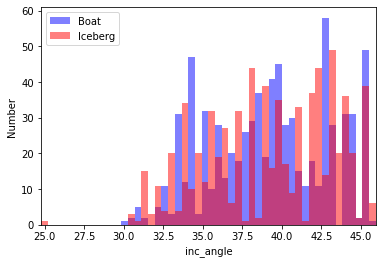

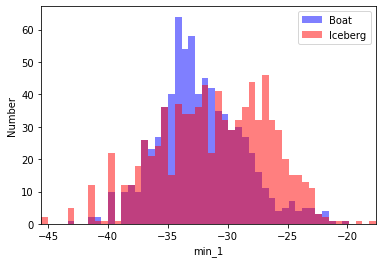

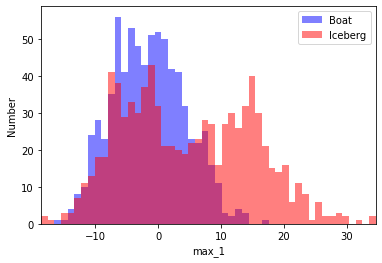

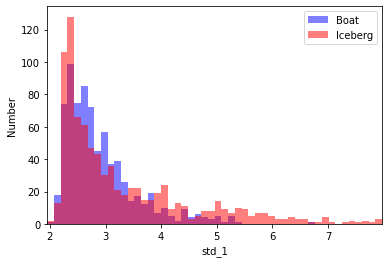

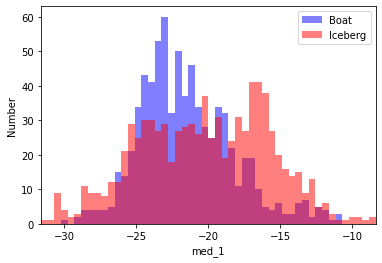

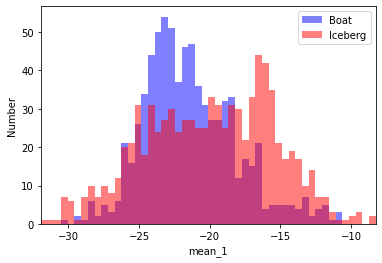

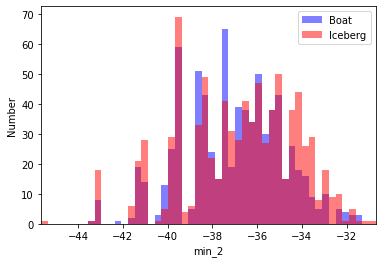

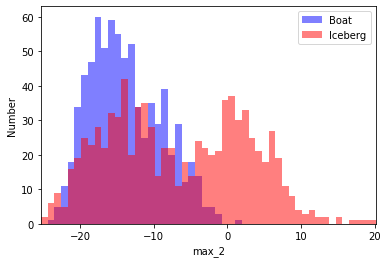

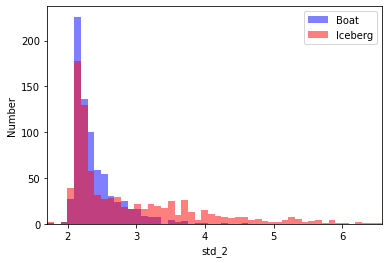

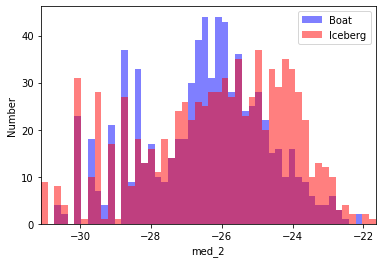

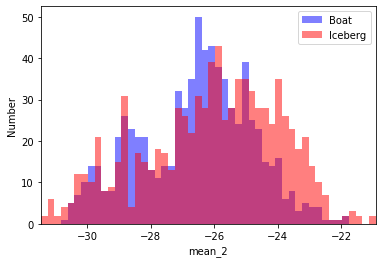

In [57]:
for col in ['inc_angle','min_1','max_1','std_1','med_1','mean_1','min_2','max_2','std_2','med_2','mean_2']:
    plot_var(col)

### Plotting correlations between features

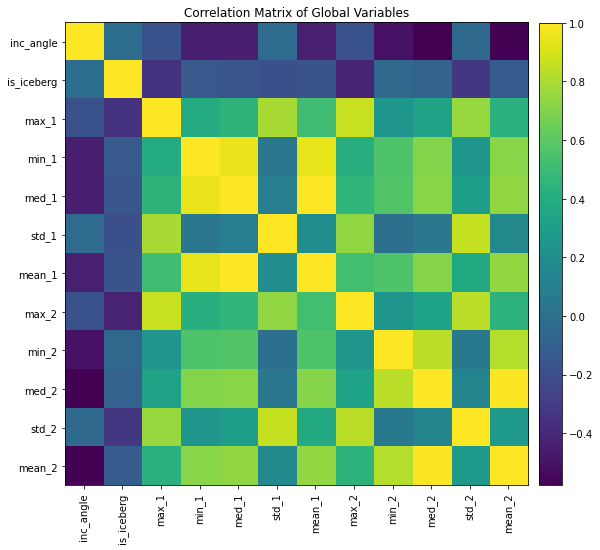

In [50]:
train_stats = data_train_visualisation.drop(['id','band_1','band_2'],axis=1)

corr = train_stats.corr()
fig = plt.figure(1, figsize=(10,10))
plt.imshow(corr,cmap='viridis')
labels = np.arange(len(train_stats.columns))
plt.xticks(labels,train_stats.columns,rotation=90)
plt.yticks(labels,train_stats.columns)
plt.title('Correlation Matrix of Global Variables')
cbar = plt.colorbar(shrink=0.85,pad=0.02)
plt.show()

### Generate the training data

In [4]:
#Create 3 bands having HH, HV and avg of both
X_band_1=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_1"]])
X_band_2=np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in train["band_2"]])
X_train = np.concatenate([X_band_1[:, :, :, np.newaxis], 
                          X_band_2[:, :, :, np.newaxis],
                          ((X_band_1+X_band_2)/2)[:, :, :, np.newaxis]], axis=-1)

# Feature scaling doesn't make better results
# X_train /= 255

### Plotting 3D iceberg and ship example

In [6]:
py.init_notebook_mode(connected=True)
def plotmy3d(c, name):

    data = [
        go.Surface(
            z=c
        )
    ]
    layout = go.Layout(
        title=name,
        autosize=False,
        width=700,
        height=700,
        margin=dict(
            l=65,
            r=50,
            b=65,
            t=90
        )
    )
    fig = go.Figure(data=data, layout=layout)
    py.iplot(fig)
plotmy3d(X_band_1[12,:,:], 'Iceberg')

In [62]:
plotmy3d(X_band_1[14,:,:], 'Ship')

### Plotting 2D iceberg and ship example using band1 and band2 feature

In [66]:
print('Is iceberg id12 = ', train['is_iceberg'][12])
print('Is iceberg id14 = ', train['is_iceberg'][14])

Is iceberg id12 =  1
Is iceberg id14 =  0


Text(0.5, 1.05, 'Ship')

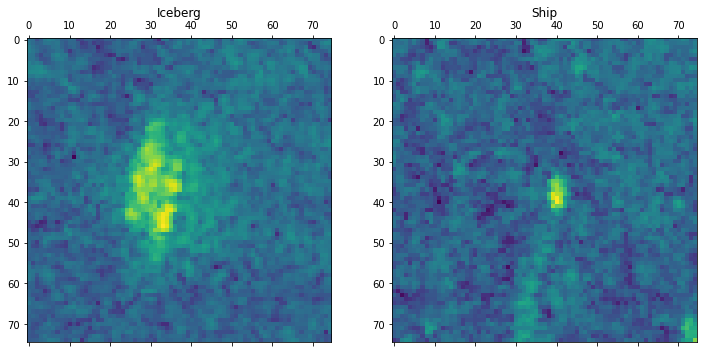

In [67]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))
ax1.matshow(X_band_1[12,:,:])
ax1.set_title('Iceberg')
ax2.matshow(X_band_1[14,:,:])
ax2.set_title('Ship')


Text(0.5, 1.05, 'Ship')

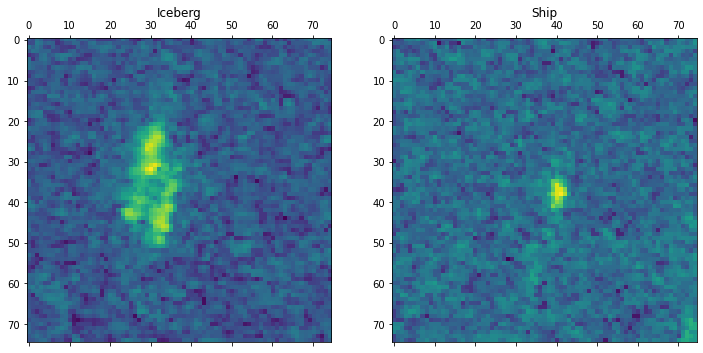

In [68]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12, 6))
ax1.matshow(X_band_2[12,:,:])
ax1.set_title('Iceberg')
ax2.matshow(X_band_2[14,:,:])
ax2.set_title('Ship')

### Splitting data

In [5]:
target_train=train['is_iceberg']
X_train_cv, X_valid, y_train_cv, y_valid = train_test_split(X_train, target_train, random_state=1, train_size=0.75)

### Setting constant parameters

In [6]:
batch_size = 24
epochs = 50

# initiate optimizers
opt_sgd = keras.optimizers.SGD()
opt_adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)

### Training model 

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_44 (Conv2D)           (None, 73, 73, 64)        1792      
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 36, 36, 64)        36928     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 20736)             0         
_________________________________________________________________
dense_44 (Dense)             (None, 30)                622110    
_________________________________________________________________
activation_44 (Activation)   (None, 30)                0         
_________________________________________________________________
dense_45 (Dense)             (None, 1)               

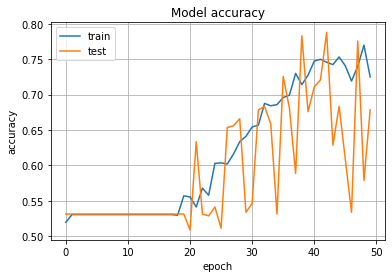

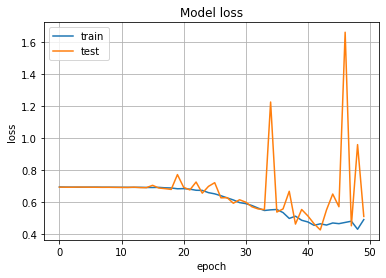

In [38]:
# First version of model with SGD optimizer

convNN = Sequential()
convNN.add(Conv2D(64, kernel_size=(3, 3),  \
                  input_shape=(75, 75, 3), \
                  activation='relu'))
    
convNN.add(Conv2D(64, kernel_size=(3, 3), strides = (2, 2), activation='relu'))
convNN.add(MaxPooling2D(pool_size=(2, 2)))
    
convNN.add(Flatten())
    
convNN.add(Dense(30))
convNN.add(Activation('relu'))

convNN.add(Dense(1))
convNN.add(Activation('sigmoid'))

convNN.summary()

convNN.compile(loss='binary_crossentropy',
                  optimizer=opt_sgd,
                  metrics=['accuracy'])

history = convNN.fit(X_train_cv, y_train_cv, batch_size=batch_size, epochs=epochs,
                          validation_data=(X_valid, y_valid), shuffle=True, 
                          verbose=1)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.grid()
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 73, 73, 64)        1792      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 36, 36, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 18, 18, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 20736)             0         
_________________________________________________________________
dense_15 (Dense)             (None, 30)                622110    
_________________________________________________________________
activation_15 (Activation)   (None, 30)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                

Epoch 49/50
51/51 [==============================] - 4s 86ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.6693 - val_accuracy: 0.8404
Epoch 50/50
51/51 [==============================] - 4s 86ms/step - loss: 0.0083 - accuracy: 1.0000 - val_loss: 0.7323 - val_accuracy: 0.8329


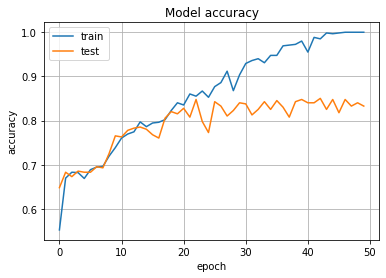

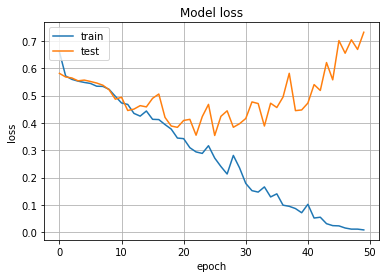

In [17]:
# First version of model with Adam optimizer

convNN = Sequential()

# CNN 1
convNN.add(Conv2D(64, kernel_size=(3, 3),  \
                  input_shape=(75, 75, 3), \
                  activation='relu'))
# CNN 2    
convNN.add(Conv2D(64, kernel_size=(3, 3), strides = (2, 2), activation='relu'))
convNN.add(MaxPooling2D(pool_size=(2, 2)))
    
convNN.add(Flatten())
    
convNN.add(Dense(30))
convNN.add(Activation('relu'))

convNN.add(Dense(1))
convNN.add(Activation('sigmoid'))

convNN.summary()

convNN.compile(loss='binary_crossentropy',
                  optimizer=opt_adam,
                  metrics=['accuracy'])

history = convNN.fit(X_train_cv, y_train_cv, batch_size=batch_size, epochs=epochs,
                          validation_data=(X_valid, y_valid), shuffle=True, 
                          verbose=1)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.grid()
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 73, 73, 64)        1792      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 17, 17, 64)        36928     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 4096)             

51/51 [==============================] - 4s 85ms/step - loss: 0.3114 - accuracy: 0.8620 - val_loss: 0.3437 - val_accuracy: 0.8479
Epoch 46/50
51/51 [==============================] - 4s 85ms/step - loss: 0.3225 - accuracy: 0.8537 - val_loss: 0.3370 - val_accuracy: 0.8429
Epoch 47/50
51/51 [==============================] - 4s 87ms/step - loss: 0.3125 - accuracy: 0.8603 - val_loss: 0.3224 - val_accuracy: 0.8603
Epoch 48/50
51/51 [==============================] - 4s 84ms/step - loss: 0.3135 - accuracy: 0.8595 - val_loss: 0.3416 - val_accuracy: 0.8454
Epoch 49/50
51/51 [==============================] - 4s 82ms/step - loss: 0.3064 - accuracy: 0.8587 - val_loss: 0.3161 - val_accuracy: 0.8628
Epoch 50/50
51/51 [==============================] - 4s 82ms/step - loss: 0.2989 - accuracy: 0.8620 - val_loss: 0.3230 - val_accuracy: 0.8603


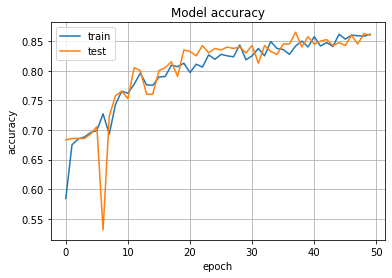

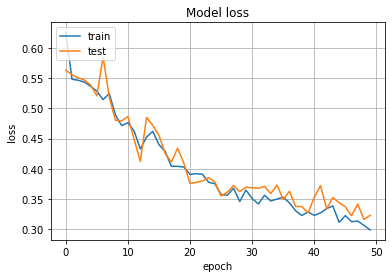

In [18]:
# Second version of model with Adam optimizer

convNN = Sequential()

# CNN 1
convNN.add(Conv2D(64, kernel_size=(3, 3),  \
                  input_shape=(75, 75, 3), \
                  activation='relu'))
convNN.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
convNN.add(Dropout(0.2))

# CNN 2
convNN.add(Conv2D(64, kernel_size=(3, 3), strides = (2, 2), activation='relu'))
convNN.add(MaxPooling2D(pool_size=(2, 2)))
convNN.add(Dropout(0.2))

convNN.add(Flatten())
    
convNN.add(Dense(30))
convNN.add(Activation('relu'))
convNN.add(Dropout(0.2))

convNN.add(Dense(1))
convNN.add(Activation('sigmoid'))

convNN.summary()

convNN.compile(loss='binary_crossentropy',
                  optimizer=opt_adam,
                  metrics=['accuracy'])

history = convNN.fit(X_train_cv, y_train_cv, batch_size=batch_size, epochs=epochs,
                          validation_data=(X_valid, y_valid), shuffle=True, 
                          verbose=1)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.grid()
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_42 (Conv2D)           (None, 69, 69, 64)        9472      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 34, 34, 64)        0         
_________________________________________________________________
dropout_46 (Dropout)         (None, 34, 34, 64)        0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_47 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_20 (Flatten)         (None, 4096)            

Epoch 45/50
51/51 [==============================] - 5s 107ms/step - loss: 0.3125 - accuracy: 0.8570 - val_loss: 0.3633 - val_accuracy: 0.8504
Epoch 46/50
51/51 [==============================] - 6s 110ms/step - loss: 0.2984 - accuracy: 0.8695 - val_loss: 0.3815 - val_accuracy: 0.8504
Epoch 47/50
51/51 [==============================] - 5s 107ms/step - loss: 0.3289 - accuracy: 0.8520 - val_loss: 0.3371 - val_accuracy: 0.8504
Epoch 48/50
51/51 [==============================] - 5s 106ms/step - loss: 0.3173 - accuracy: 0.8487 - val_loss: 0.3493 - val_accuracy: 0.8479
Epoch 49/50
51/51 [==============================] - 5s 105ms/step - loss: 0.3035 - accuracy: 0.8612 - val_loss: 0.3444 - val_accuracy: 0.8479
Epoch 50/50
51/51 [==============================] - 5s 106ms/step - loss: 0.3060 - accuracy: 0.8595 - val_loss: 0.3385 - val_accuracy: 0.8579


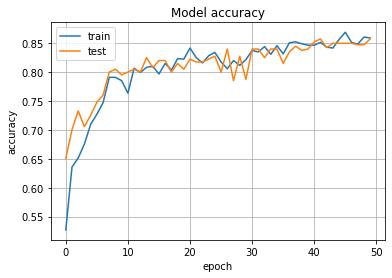

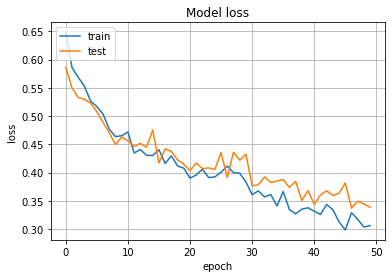

In [36]:
# Second version of model with Adam optimizer with (7,7) kernel_size

convNN = Sequential()

# CNN 1
convNN.add(Conv2D(64, kernel_size=(7, 7),  \
                  input_shape=(75, 75, 3), \
                  activation='relu'))
convNN.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
convNN.add(Dropout(0.2))

# CNN 2
convNN.add(Conv2D(64, kernel_size=(3, 3), strides = (2, 2), activation='relu'))
convNN.add(MaxPooling2D(pool_size=(2, 2)))
convNN.add(Dropout(0.2))

convNN.add(Flatten())
    
convNN.add(Dense(30))
convNN.add(Activation('relu'))
convNN.add(Dropout(0.2))

convNN.add(Dense(1))
convNN.add(Activation('sigmoid'))

convNN.summary()

convNN.compile(loss='binary_crossentropy',
                  optimizer=opt_adam,
                  metrics=['accuracy'])

history = convNN.fit(X_train_cv, y_train_cv, batch_size=batch_size, epochs=epochs,
                          validation_data=(X_valid, y_valid), shuffle=True, 
                          verbose=1)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.grid()
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_46 (Conv2D)           (None, 73, 73, 64)        1792      
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 17, 17, 64)        36928     
_________________________________________________________________
max_pooling2d_40 (MaxPooling (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_50 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 4096)            

51/51 [==============================] - 5s 92ms/step - loss: 0.3731 - accuracy: 0.8346 - val_loss: 0.4009 - val_accuracy: 0.8279
Epoch 46/50
51/51 [==============================] - 5s 95ms/step - loss: 0.3758 - accuracy: 0.8113 - val_loss: 0.3620 - val_accuracy: 0.8204
Epoch 47/50
51/51 [==============================] - 5s 93ms/step - loss: 0.3601 - accuracy: 0.8296 - val_loss: 0.3765 - val_accuracy: 0.8279
Epoch 48/50
51/51 [==============================] - 5s 97ms/step - loss: 0.3563 - accuracy: 0.8362 - val_loss: 0.3855 - val_accuracy: 0.8279
Epoch 49/50
51/51 [==============================] - 5s 93ms/step - loss: 0.3631 - accuracy: 0.8337 - val_loss: 0.3653 - val_accuracy: 0.8130
Epoch 50/50
51/51 [==============================] - 5s 93ms/step - loss: 0.3543 - accuracy: 0.8346 - val_loss: 0.3716 - val_accuracy: 0.8329


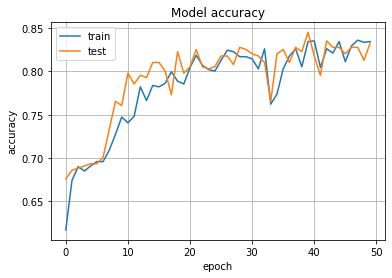

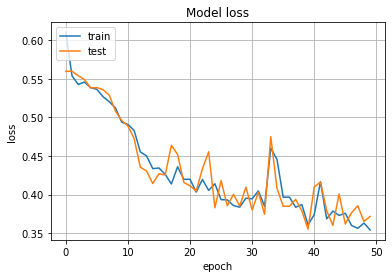

In [69]:
# Second version of model with Adam optimizer and normalized data
X_nd = X_train
X_nd /= 255
X_train_nd, X_valid_nd, y_train_nd, y_valid_nd = train_test_split(X_nd, target_train, random_state=1, train_size=0.75)

convNN = Sequential()

# CNN 1
convNN.add(Conv2D(64, kernel_size=(3, 3),  \
                  input_shape=(75, 75, 3), \
                  activation='relu'))
convNN.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
convNN.add(Dropout(0.2))

# CNN 2
convNN.add(Conv2D(64, kernel_size=(3, 3), strides = (2, 2), activation='relu'))
convNN.add(MaxPooling2D(pool_size=(2, 2)))
convNN.add(Dropout(0.2))

convNN.add(Flatten())
    
convNN.add(Dense(30))
convNN.add(Activation('relu'))
convNN.add(Dropout(0.2))

convNN.add(Dense(1))
convNN.add(Activation('sigmoid'))

convNN.summary()

convNN.compile(loss='binary_crossentropy',
                  optimizer=opt_adam,
                  metrics=['accuracy'])

history = convNN.fit(X_train_nd, y_train_nd, batch_size=batch_size, epochs=epochs,
                          validation_data=(X_valid_nd, y_valid_nd), shuffle=True, 
                          verbose=1)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.grid()
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 73, 73, 64)        1792      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 17, 17, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 8, 8, 128)         0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 3, 3, 64)         

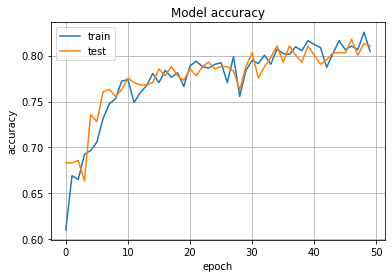

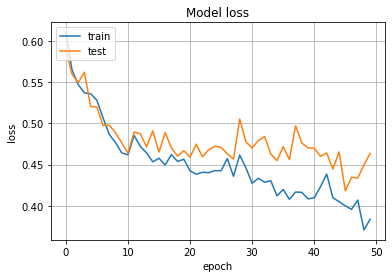

In [19]:
# Third version of model with Adam optimizer

convNN = Sequential()

# CNN 1
convNN.add(Conv2D(64, kernel_size=(3, 3),  \
                  input_shape=(75, 75, 3), \
                  activation='relu'))
convNN.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
convNN.add(Dropout(0.2))

# CNN 2
convNN.add(Conv2D(128, kernel_size=(3, 3), strides = (2, 2), activation='relu'))
convNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
convNN.add(Dropout(0.2))

# CNN 3
convNN.add(Conv2D(64, kernel_size=(3, 3), strides = (2, 2), activation='relu'))
convNN.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
convNN.add(Dropout(0.2))

# Flatten the data for the dense layers
convNN.add(Flatten())
    
# Dense 1
convNN.add(Dense(256))
convNN.add(Activation('relu'))
convNN.add(Dropout(0.2))

# Dense 2
convNN.add(Dense(128))
convNN.add(Activation('relu'))
convNN.add(Dropout(0.2))

# Output
convNN.add(Dense(1))
convNN.add(Activation('sigmoid'))

convNN.summary()

convNN.compile(loss='binary_crossentropy',
                  optimizer=opt_adam,
                  metrics=['accuracy'])

history = convNN.fit(X_train_cv, y_train_cv, batch_size=batch_size, epochs=epochs,
                          validation_data=(X_valid, y_valid), shuffle=True, 
                          verbose=1)

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.grid()
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.grid()
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


### StratifiedKFold 

In [12]:
X = X_train
Y = target_train

#epochs = 50

kfold = StratifiedKFold(n_splits=4, shuffle=True, random_state=10)
cvscores = []

for train, test in kfold.split(X, Y):
    convNN = Sequential()

    # CNN 1
    convNN.add(Conv2D(64, kernel_size=(3, 3),  \
                      input_shape=(75, 75, 3), \
                      activation='relu'))
    convNN.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    convNN.add(Dropout(0.2))

    # CNN 2
    convNN.add(Conv2D(64, kernel_size=(3, 3), strides = (2, 2), activation='relu'))
    convNN.add(MaxPooling2D(pool_size=(2, 2)))
    convNN.add(Dropout(0.2))

    convNN.add(Flatten())

    convNN.add(Dense(30))
    convNN.add(Activation('relu'))
    convNN.add(Dropout(0.2))

    convNN.add(Dense(1))
    convNN.add(Activation('sigmoid'))

    convNN.summary()

    convNN.compile(loss='binary_crossentropy',
                      optimizer=opt_adam,
                      metrics=['accuracy'])

    history = convNN.fit(X[train], Y[train], batch_size=batch_size, epochs=epochs,
                              shuffle=True, verbose=1)
    convNN.fit(X[train], Y[train], batch_size=batch_size, epochs=epochs, shuffle=True,
    verbose=1)
    
    scores = convNN.evaluate(X[test], Y[test], verbose=0)
    cvscores.append(scores)
    
print(cvscores)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 73, 73, 64)        1792      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 17, 17, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 4096)             

Epoch 24/50
51/51 [==============================] - 4s 82ms/step - loss: 0.4269 - accuracy: 0.7889
Epoch 25/50
51/51 [==============================] - 4s 82ms/step - loss: 0.4238 - accuracy: 0.8005
Epoch 26/50
51/51 [==============================] - 4s 82ms/step - loss: 0.4150 - accuracy: 0.8130
Epoch 27/50
51/51 [==============================] - 4s 81ms/step - loss: 0.4070 - accuracy: 0.8013
Epoch 28/50
51/51 [==============================] - 4s 81ms/step - loss: 0.4089 - accuracy: 0.8096
Epoch 29/50
51/51 [==============================] - 4s 81ms/step - loss: 0.4122 - accuracy: 0.8038
Epoch 30/50
51/51 [==============================] - 4s 81ms/step - loss: 0.3790 - accuracy: 0.8313
Epoch 31/50
51/51 [==============================] - 4s 81ms/step - loss: 0.4045 - accuracy: 0.8138
Epoch 32/50
51/51 [==============================] - 4s 81ms/step - loss: 0.4073 - accuracy: 0.8180
Epoch 33/50
51/51 [==============================] - 4s 81ms/step - loss: 0.3934 - accuracy: 0.8238


51/51 [==============================] - 5s 89ms/step - loss: 1.6076 - accuracy: 0.6068
Epoch 2/50
51/51 [==============================] - 4s 87ms/step - loss: 0.5567 - accuracy: 0.6725
Epoch 3/50
51/51 [==============================] - 4s 86ms/step - loss: 0.5499 - accuracy: 0.6841
Epoch 4/50
51/51 [==============================] - 4s 86ms/step - loss: 0.5403 - accuracy: 0.6850
Epoch 5/50
51/51 [==============================] - 4s 85ms/step - loss: 0.5272 - accuracy: 0.7066 3s
Epoch 6/50
51/51 [==============================] - 4s 86ms/step - loss: 0.5249 - accuracy: 0.6991
Epoch 7/50
51/51 [==============================] - 5s 89ms/step - loss: 0.5078 - accuracy: 0.7215
Epoch 8/50
51/51 [==============================] - 4s 87ms/step - loss: 0.5047 - accuracy: 0.7332
Epoch 9/50
51/51 [==============================] - 4s 87ms/step - loss: 0.5050 - accuracy: 0.7232
Epoch 10/50
51/51 [==============================] - 5s 88ms/step - loss: 0.4890 - accuracy: 0.7481 0s - loss: 0.4830

51/51 [==============================] - 4s 84ms/step - loss: 0.6912 - accuracy: 0.5312
Epoch 42/50
51/51 [==============================] - 4s 83ms/step - loss: 0.6912 - accuracy: 0.5312
Epoch 43/50
51/51 [==============================] - 4s 84ms/step - loss: 0.6912 - accuracy: 0.5312
Epoch 44/50
51/51 [==============================] - 4s 83ms/step - loss: 0.6912 - accuracy: 0.5312
Epoch 45/50
51/51 [==============================] - 4s 84ms/step - loss: 0.6912 - accuracy: 0.5312
Epoch 46/50
51/51 [==============================] - 4s 84ms/step - loss: 0.6912 - accuracy: 0.5312
Epoch 47/50
51/51 [==============================] - 4s 83ms/step - loss: 0.6913 - accuracy: 0.5312
Epoch 48/50
51/51 [==============================] - 4s 83ms/step - loss: 0.6912 - accuracy: 0.5312
Epoch 49/50
51/51 [==============================] - 4s 83ms/step - loss: 0.6912 - accuracy: 0.5312
Epoch 50/50
51/51 [==============================] - 4s 84ms/step - loss: 0.6913 - accuracy: 0.5312
Epoch 1/50
5

[0.8129675984382629, 0.8428927659988403, 0.8478803038597107, 0.528678297996521]


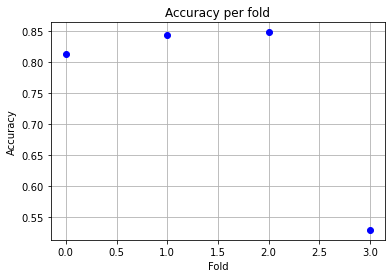

In [14]:
accuracy_per_fold = []
for i in range(4):
    accuracy_per_fold.append(cvscores[i][1])
    
plt.plot(accuracy_per_fold, 'bo')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid()
plt.title('Accuracy per fold')

print(accuracy_per_fold)